In [1]:
# From Python
# It requires OpenCV installed for Python

from IPython.display import clear_output, Image, display, HTML
import time

import matplotlib.pyplot as plt
import numpy as np

import sys
import cv2
import os
from sys import platform
import argparse

%matplotlib inline

# Import Openpose (Windows/Ubuntu/OSX)
dir_path = os.path.abspath("")
print(dir_path)

/openpose/build/examples/tutorial_api_python


In [2]:
try:
    # Windows Import
    if platform == "win32":
        # Change these variables to point to the correct folder (Release/x64 etc.) 
        sys.path.append(dir_path + '/../../python/openpose/Release');
        os.environ['PATH']  = os.environ['PATH'] + ';' + dir_path + '/../../x64/Release;' +  dir_path + '/../../bin;'
        import pyopenpose as op
        print("YES")
    else:
        # Change these variables to point to the correct folder (Release/x64 etc.) 
        sys.path.append('../../python');
        # If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
        # sys.path.append('/usr/local/python')
        from openpose import pyopenpose as op
        print("YESYES")
except ImportError as e:
    print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
    raise e



YESYES


In [3]:
# Flags
parser = argparse.ArgumentParser()
# parser.add_argument("--image_path", default="../../../examples/media/COCO_val2014_000000000192.jpg", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
# parser.add_argument("--image_path", default="../../../examples/media/video.avi", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
# parser.add_argument("--video", default="../../../examples/media/video.avi", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
parser.add_argument("--video", default="../../../examples/media/myrb.mp4", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")

args = parser.parse_known_args()



In [4]:
# Custom Params (refer to include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = "../../../models/"
# params["video"] = True
params["hand"] = True
params["hand_detector"] = 2
params["body"] = 0


# Add others in path?
for i in range(0, len(args[1])):
    curr_item = args[1][i]
    if i != len(args[1])-1: next_item = args[1][i+1]
    else: next_item = "1"
    if "--" in curr_item and "--" in next_item:
        key = curr_item.replace('-','')
        if key not in params:  params[key] = "1"
    elif "--" in curr_item and "--" not in next_item:
        key = curr_item.replace('-','')
        if key not in params: params[key] = next_item
print(params)


{'model_folder': '../../../models/', 'hand': True, 'hand_detector': 2, 'body': 0}


In [5]:
def arrayShow(img):
    _,ret = cv2.imencode('.jpg', img) 
    return Image(data=ret) 

In [6]:
# Construct it from system arguments
# op.init_argv(args[1])
# oppython = op.OpenposePython()

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()



In [7]:
# 自訂手部偵測範圍

handRectangles = [
    [
    op.Rectangle(40, 100,150, 150),
    op.Rectangle(120, 100,150, 150),
    ]
]

# handRectangles = [
#     [
#     op.Rectangle(30, 150,120, 120),
#     op.Rectangle(120, 100,150, 150),
#     ]
# ]



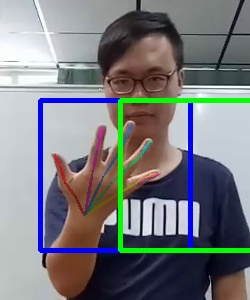

OKOK
OKOK


In [8]:
cap = cv2.VideoCapture(args[0].video)
datum = op.Datum()
datum.handRectangles = handRectangles

print(datum)
while(True):
    try:
        
        ret, frame = cap.read()
        if not ret:
                break
        clear_output(wait=True)
        
        w,h,_ = frame.shape
#         matrix = cv2.getRotationMatrix2D((h/2, w/2),0,1)
#         frame = cv2.warpAffine(frame, matrix, (h, w))

#         matrix = np.float32([[1,0,200],[0,1,500]])
#         frame = cv2.warpAffine(frame,matrix,(h,w))
        
        # w: 250 h: 300
        pts1 = np.float32([[150,100],[400,100],[150,400],[400,400]])
        pts2 = np.float32([[0,0],[250,0],[0,300],[250,300]])
        matrix = cv2.getPerspectiveTransform(pts1,pts2)
        frame = cv2.warpPerspective(frame,matrix,(250,300))

        datum.cvInputData = frame
        opWrapper.emplaceAndPop([datum])

        

        # 手部框框
        datum.cvOutputData = cv2.rectangle(datum.cvOutputData,(40, 100),(190,250),(255,0,0),3)
        datum.cvOutputData = cv2.rectangle(datum.cvOutputData,(120, 100),(270,250),(0,255,0),3)
        
        
        img = arrayShow(datum.cvOutputData)
        display(img)
        print("OKOK")
        
#         plt.imshow(datum.cvOutputData)
#         plt.show()
#         cv2.waitKey(0)
    except KeyboardInterrupt:
        print("exception")
        video.release()
print("OKOK")